In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


1.	Perform a preliminary data inspection and Data cleaning

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


a.	Check for missing data and formulate apt strategy to treat them.

In [8]:
df.isna().sum().sum()

136534

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.drop(df[df['CustomerID'].isna()].index, inplace = True)

In [11]:
df.isna().sum().sum()

0

We will drop all the records where the customer ID is Null as it has no significance and he records where Description is Null will be automatically treated when discarding records with missing values of customer ID.

b. Remove duplicate data records.

In [12]:
df.duplicated().sum()

5225

In [13]:
df = df.drop_duplicates()
df.shape

(401604, 8)

c. Remove the transaction of last month in year 2011 as they have only date for 9 days

In [14]:
# CustomerID is 'float64', changing the datatype of CustomerId to string as Customer ID as numerical data does not make sense

df['CustomerID'] = df['CustomerID'].astype(str)

In [15]:
df.describe(datetime_is_numeric=True)


,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:30,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283037,NaN,69.764035


In [17]:
df.describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [18]:
df.describe(include=['O'])

,InvoiceNo,StockCode,Description,CustomerID,Country
count,401604,401604,401604,401604,401604
unique,22190,3684,3896,4372,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom
freq,542,2065,2058,7812,356728


InvoiceNo: Total entries in preprocessed data are 4,01,602 but transactions are 22,190. Most number of entries (count of unique products) are in Invoice No. '576339' and is 542 nos.
StockCode: There are total 3684 unique products in our data and product with stock code '85123A' appears most frequently (2065 times) in our data.
CustomerID: There are 4372 unique customers in our final preprocessed data. Customer with ID '17841' appears most frequently in data (7812 times)
Country: Company has customers across 37 countries. Most entries are from United Kingdom in our dataset (356726)

2. Perform Cohort Analysis

a. Create month cohort of customers and analyze active customers in each cohort:

In [26]:
df1 = df.groupby(pd.Grouper(key="InvoiceDate", axis=0, freq="M")).nunique()

In [27]:
monthwise_cohort = df1['CustomerID']

In [28]:
monthwise_cohort

InvoiceDate
2010-12-31     948
2011-01-31     783
2011-02-28     798
2011-03-31    1020
2011-04-30     899
2011-05-31    1079
2011-06-30    1051
2011-07-31     993
2011-08-31     980
2011-09-30    1302
2011-10-31    1425
2011-11-30    1711
2011-12-31     686
Freq: M, Name: CustomerID, dtype: int64

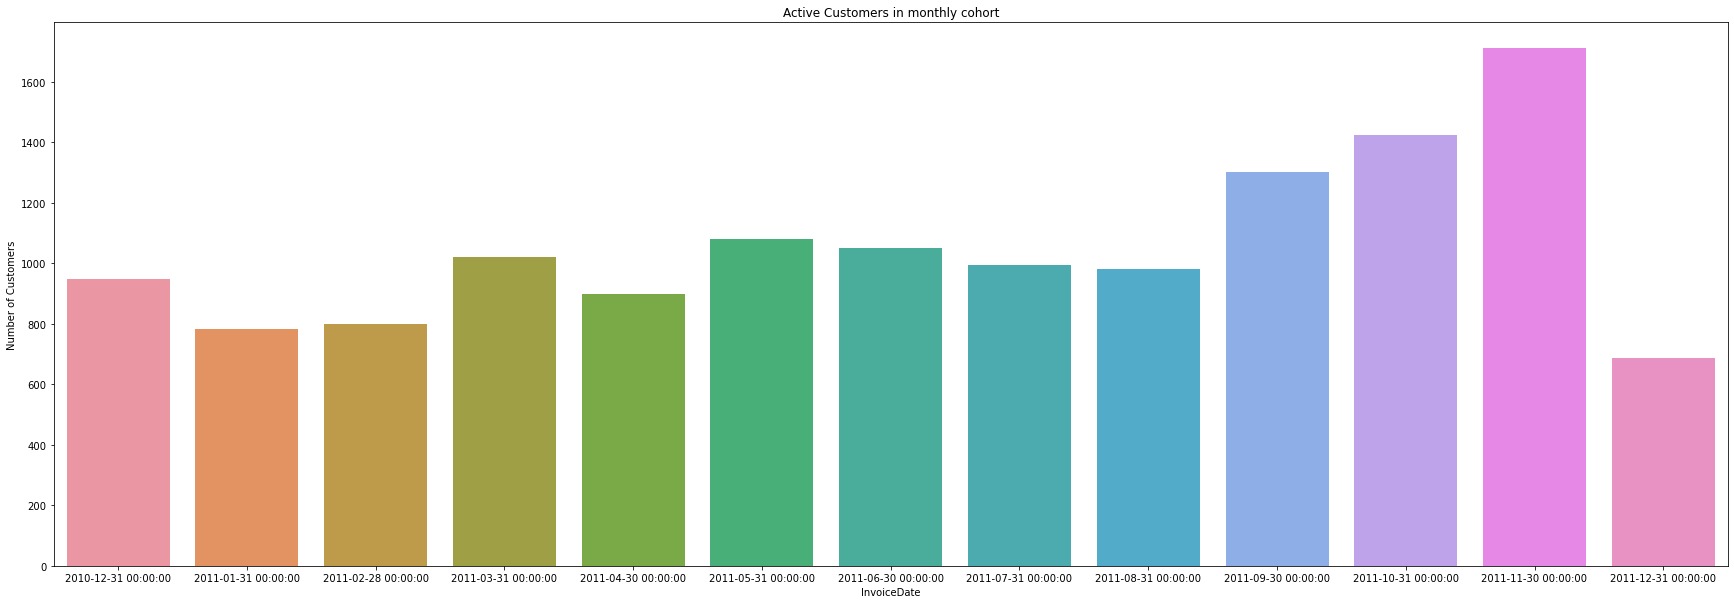

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(x = monthwise_cohort.index, y = monthwise_cohort.values)
plt.title("Active Customers in monthly cohort")
plt.ylabel("Number of Customers")
plt.show()

b. Analyze the retention rate of customers.

In [31]:
monthwise_cohort - monthwise_cohort.shift(1)

InvoiceDate
2010-12-31       NaN
2011-01-31    -165.0
2011-02-28      15.0
2011-03-31     222.0
2011-04-30    -121.0
2011-05-31     180.0
2011-06-30     -28.0
2011-07-31     -58.0
2011-08-31     -13.0
2011-09-30     322.0
2011-10-31     123.0
2011-11-30     286.0
2011-12-31   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [32]:
retention_rate = round((monthwise_cohort.pct_change())*100,2)
retention_rate

InvoiceDate
2010-12-31      NaN
2011-01-31   -17.41
2011-02-28     1.92
2011-03-31    27.82
2011-04-30   -11.86
2011-05-31    20.02
2011-06-30    -2.59
2011-07-31    -5.52
2011-08-31    -1.31
2011-09-30    32.86
2011-10-31     9.45
2011-11-30    20.07
2011-12-31   -59.91
Freq: M, Name: CustomerID, dtype: float64

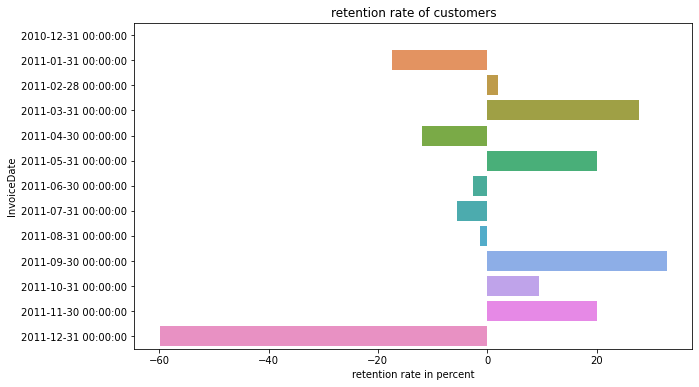

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x = retention_rate.values, y = retention_rate.index)
plt.title("retention rate of customers")
plt.xlabel("retention rate in percent")
plt.show()

Machine Learning

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

In [34]:
# Total price 
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [35]:
# Consider refrence date +1 because we will get the transaction done on the last date.
from datetime import timedelta
refrence_date = (df["InvoiceDate"].max()) + timedelta(days=1)
print("refrence Date: ", refrence_date)

refrence Date:  2011-12-10 12:50:00


In [36]:
RFM = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (refrence_date-x.max()).days,"InvoiceNo": "count","TotalPrice": 'sum'})

a. Calculate RFM metrics.

In [37]:
RFM.rename(columns = {'InvoiceDate':"Recency", "InvoiceNo": "Frequency", "TotalPrice": "MonetaryValue"}, inplace=True)

In [38]:
RFM

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


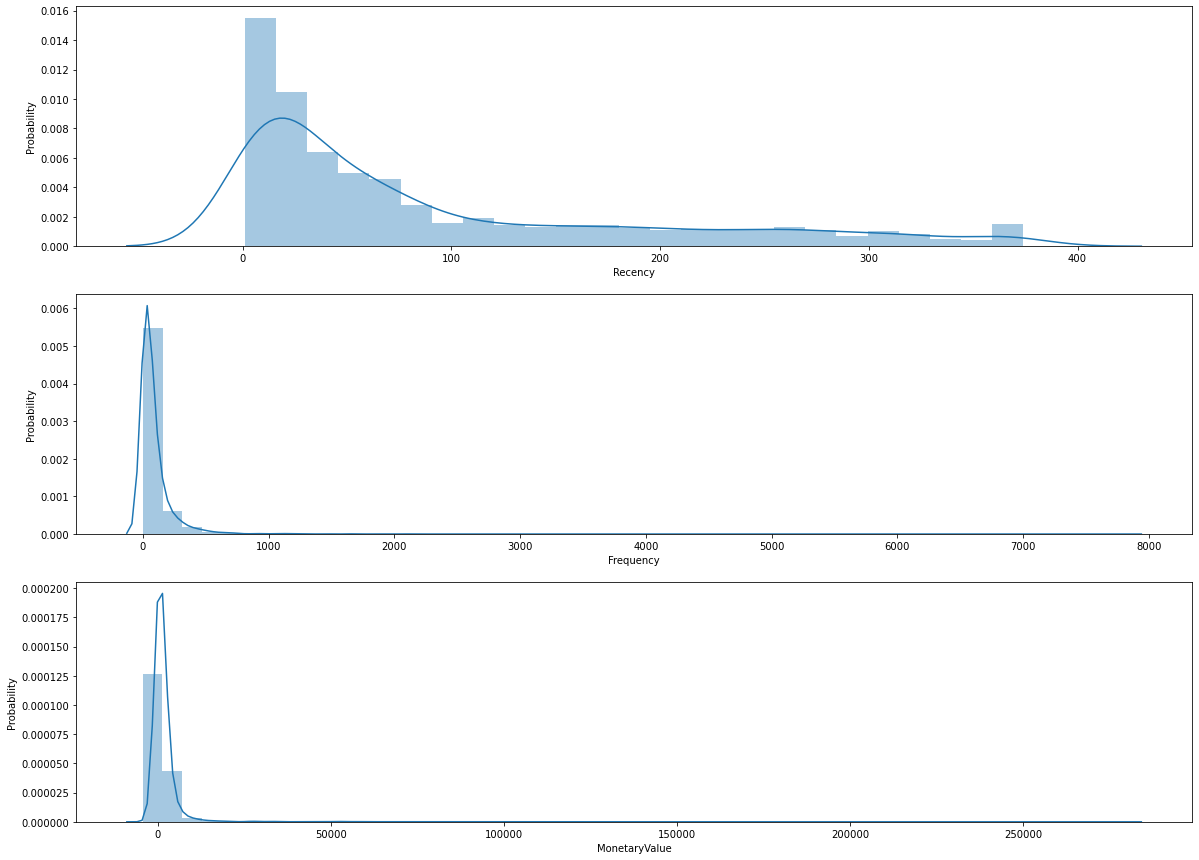

In [39]:
# Plot the RFM distribution 
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.distplot(RFM['Recency'])
plt.xlabel('Recency')
plt.ylabel('Probability')

plt.subplot(3,1,2)
sns.distplot(RFM['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Probability')

plt.subplot(3,1,3)
sns.distplot(RFM['MonetaryValue'])
plt.xlabel('MonetaryValue')
plt.ylabel('Probability')

plt.show()

b Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.
b1. Combine three ratings to get a RFM segment (as strings).
b2. Get the RFM score by adding up the three ratings.
b3. Analyze the RFM segments by summarizing them and comment on the findings.

In [40]:
# Creating the rating by using the quartile function
rlabel = range(4,0,-1)
flabel = range(1,5)
mlabel = range(1,5)

# Using the quartile function and give rating.
r = pd.qcut(RFM["Recency"], q =4, labels = rlabel)
f = pd.qcut(RFM["Frequency"],q = 4, labels=flabel)
m = pd.qcut(RFM["MonetaryValue"],q = 4, labels=mlabel)

RFM["R"] = r.values
RFM["F"] = f.values
RFM["M"] = m.values

In [41]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [42]:
RFM['RFM_concat'] = RFM.apply(lambda x: str(x["R"]) + str(x["F"]) + str(x["M"]), axis=1)

In [43]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0
12347.0,2,182,4310.00,4,4,4,4.04.04.0
12348.0,75,31,1797.24,2,2,4,2.02.04.0
12349.0,19,73,1757.55,3,3,4,3.03.04.0
12350.0,310,17,334.40,1,1,2,1.01.02.0


In [44]:
RFM["RFM_score"] = RFM.apply(lambda x: x['R'] + x['F'] + x['M'], axis=1)

In [45]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_concat,RFM_score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4


In [46]:
# Based on scores, make the segmentes.
def segment(df):
    if df['RFM_score']>9:
        return "premiere"
    elif df['RFM_score']>7 and df['RFM_score']<10:
        return "Champions"
    elif df['RFM_score']>5 and df['RFM_score']<8:
        return "Loyal"
    elif df['RFM_score']>4 and df['RFM_score']<=5:
        return "Potential"
    elif df['RFM_score']>3 and df['RFM_score']<=4:
        return "Promissing"
    elif df['RFM_score']>2 and df['RFM_score']<=3:
        return "Need Atention"
    else:
        return "Require Activation"

In [47]:
RFM["RFM_segment"] = RFM.apply(segment, axis=1)

In [48]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_concat,RFM_score,RFM_segment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Need Atention
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,premiere
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Champions
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,premiere
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Promissing


<AxesSubplot:>

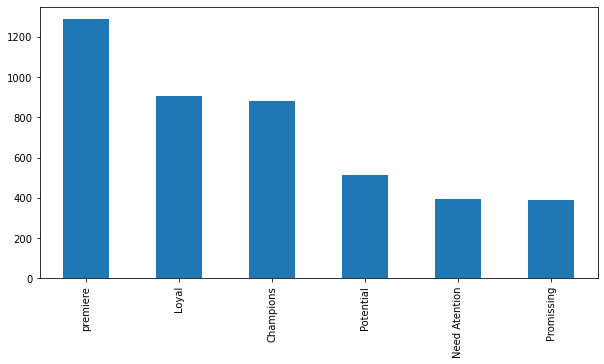

In [49]:
RFM["RFM_segment"].value_counts().plot(kind = "bar", figsize=(10, 5))

Data Modeling :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

<AxesSubplot:xlabel='MonetaryValue'>

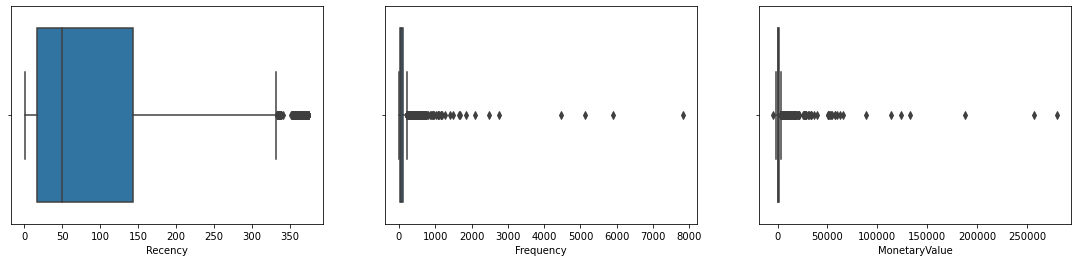

In [50]:
# Analysing Outliers
plt.figure(figsize=(19,4))
plt.subplot(1,3,1)
sns.boxplot(RFM['Recency'])

plt.subplot(1,3,2)
sns.boxplot(RFM['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(RFM['MonetaryValue'])

We can see outliers so we'll drop them.

In [51]:
RFM_clust = RFM[(RFM['Frequency']<500) & (RFM['MonetaryValue']<50000)]

In [52]:
# Checkin Symmetrical Distribution of data

<AxesSubplot:xlabel='Recency', ylabel='Count'>

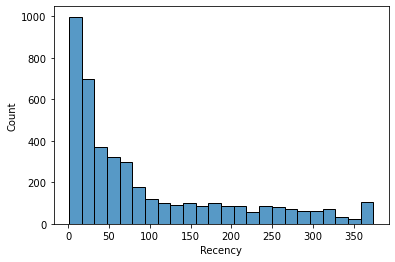

In [53]:
sns.histplot(RFM_clust['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

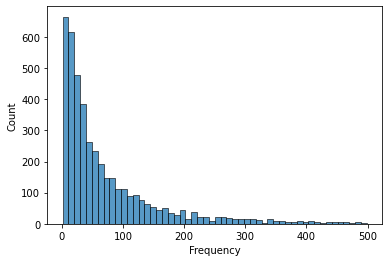

In [54]:
sns.histplot(RFM_clust['Frequency'])

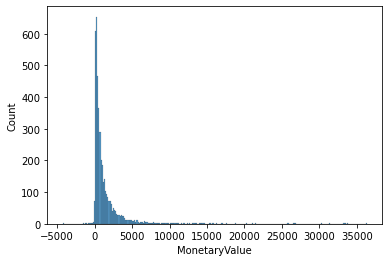

In [55]:
sns.histplot(RFM_clust['MonetaryValue'])
plt.show()

By analysing those three plots we can say that data is highly skewed. So we will apply log transformation to make data symmetric the data.

In [56]:
transform_rfm = pd.DataFrame()
transform_rfm["Recency"] = np.log(RFM_clust['Recency'])
transform_rfm["Frequency"] = np.log(RFM_clust['Frequency'])
transform_rfm["MonetaryValue"] = np.log(RFM_clust['MonetaryValue']-RFM_clust['MonetaryValue'].min()+1)

In [57]:
from sklearn.preprocessing import StandardScaler


In [58]:
sc = StandardScaler()

In [59]:
scaled_rfm = sc.fit_transform(transform_rfm)

In [60]:
scaled_rfm = pd.DataFrame(scaled_rfm, columns = ["Recency", "Frequency", "MonetaryValue"])
scaled_rfm.head()

,Recency,Frequency,MonetaryValue
0,1.397441,-2.290336,-0.767326
1,-2.141630,1.246242,1.571347
2,0.376515,-0.141478,0.409355
3,-0.577462,0.530008,0.387358
4,1.362476,-0.612494,-0.514903


b. Decide the optimum number of clusters to be formed.

In [70]:
from sklearn.cluster import KMeans

In [62]:
km = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state=10)

In [63]:
clusters = km.fit_predict(scaled_rfm)

In [64]:
from sklearn.metrics import silhouette_score

silhouette_score(scaled_rfm, clusters)

0.2886817425451894

In [65]:
# Elbow method to get the optimal number of clusters

In [74]:
i_list = []
for i in range(2,11):
    km = KMeans(n_clusters = i, random_state = 10)
    km.fit(scaled_rfm)
    i_list.append(km.inertia_)

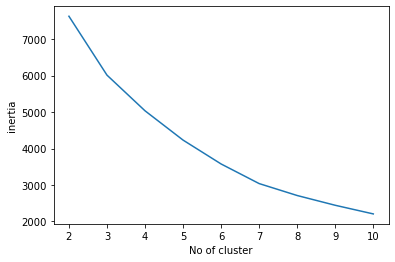

In [76]:
plt.plot(range(2,11),i_list)
plt.xlabel("No of cluster")
plt.ylabel("inertia")
plt.show()

In [77]:
n_cluster = (range(2,11))
inertia = pd.DataFrame(zip(n_cluster, i_list), columns = ["cluster", "inertia"])
inertia

,cluster,inertia
0,2,7627.227765
1,3,6013.295653
2,4,5034.797532
3,5,4231.544471
4,6,3576.776007
5,7,3039.237268
6,8,2711.885111
7,9,2444.277880
8,10,2207.478142


Since elbow bend is not clear, so we can't decide the optimal number of clusters 

In [78]:
# b. Silhouette Score

In [79]:
silhouete_score = []

for i in range(2,11):
    km = KMeans(n_clusters = i, max_iter = 500, random_state = 10)
    cluster = km.fit_predict(scaled_rfm)
    score = silhouette_score(scaled_rfm, cluster)
    silhouete_score.append(score)

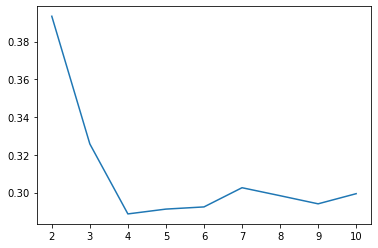

In [80]:
plt.plot(range(2,11), silhouete_score)

In [81]:
km = KMeans(n_clusters = 2, init= "k-means++", max_iter=500, random_state= 500)

In [82]:
cluster = km.fit_predict(scaled_rfm)

In [83]:
silhouette_score(scaled_rfm, cluster)

0.39343280372908596

In [84]:
RFM_clust['labeled'] = km.labels_

In [85]:
RFM_clust.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_concat,RFM_score,RFM_segment,labeled
CustomerID,,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Need Atention,0
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,premiere,1
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Champions,0
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,premiere,1
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Promissing,0


In [86]:
# c. Analyze these clusters and comment on the results.

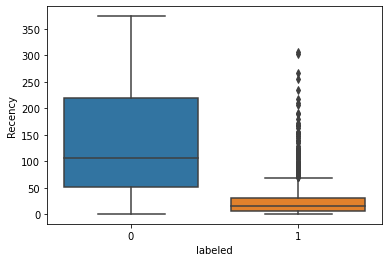

In [87]:
sns.boxplot(x='labeled', y='Recency', data=RFM_clust);

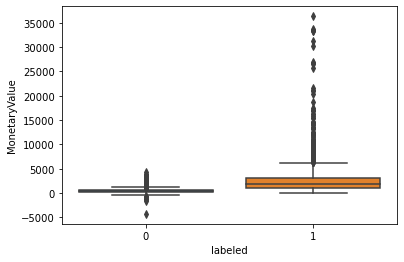

In [89]:
sns.boxplot(x='labeled', y='MonetaryValue', data=RFM_clust);

After observing the customers, it is clear that the customer in cluster 1 is loyal and frequently purchases the product, as well as spends a significant amount of money, whereas the customer in cluster 2 is a week customer who requires special attention. 

Data Reporting

https://public.tableau.com/app/profile/sanjana.patil4147/viz/Retail_16768763226730/Dashboard1?publish=yes

In [114]:
df.to_excel('master_data.xlsx', sheet_name='master_data', index=False)
RFM_clust.to_excel('rfm_data.xlsx', sheet_name='rfm_data', index=False)
inertia.to_excel('inertia_data.xlsx', sheet_name='inertia', index=False)